# Датасет по соотношению уровней счастья и коррупции в 132 странах мира за 2015-2020 гг

*Переменные*
* **Country** - название страны
* **happiness_score** - средняя оценка уровня жизни, 0-10
* **gdp_per_capita** - увровень влияния ВВП на показатель счастья
* **family** - увровень влияния семьи на показатель счастья
* **health** - увровень влияния ожидаемой продолжительности жизни на показатель счастья
* **freedom** - увровень влияния степени свободы на показатель счастья
* **generosity** - оценка уровня щедрости страны
* **government_trust** - степень влияния восприятия коррупци на показатель счастья
* **dystopia_residual** - гипотетическое сравнение своей страны с самым грустным государством в мире
* **continent** - название континента
* **Year** - год опроса
* **social_support** - оценка уровня поддержки в обществе
* **cpi_score** - индекс восприятия коррупции (чем выше, тем лучше).

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#Выгружаем и отображаем датасет

happy = pd.read_csv('WorldHappiness_Corruption_2015_2020.csv')
happy

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.000000,88
1,Denmark,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.000000,91
2,Iceland,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.000000,79
3,Switzerland,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.000000,86
4,Finland,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.000000,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.000000,0.494102,0.509089,0.033407,0.101786,0.257241,Africa,2020,1.085695,60
788,Tanzania,3.4762,0.457163,0.000000,0.442678,0.509343,0.271541,0.203881,0.718963,Africa,2020,0.872675,38
789,Rwanda,3.3123,0.343243,0.000000,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,2020,0.522876,54
790,Zimbabwe,3.2992,0.425564,0.000000,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,2020,1.047835,24


Отметим, что датасет выстроен по годам - сначала идет рейтинг от самой счастливой страны за 2015 год, затем за 2016 и т.д. При текущем отражении мы видем, что самой счастливой страной 2015 года была Норвегия, а самой несчастной в 2020 г. - Афганистан

# 1. Фильтрация и сортировка данных 

In [3]:
#В первую очередь проверяем, на предмет пропущенных значений, а также тип переменных

happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 74.3+ KB


In [4]:
happy.isna().sum()

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

In [5]:
happy['continent'].unique()

array(['Europe', 'North America', 'Australia', 'Asia', 'South America',
       'Africa'], dtype=object)

Выведем сколько стран представлено от каждого контитента

In [6]:
print(happy[happy['continent'] == 'Europe'].shape)
print(happy[happy['continent'] == 'North America'].shape)
print(happy[happy['continent'] == 'Australia'].shape)
print(happy[happy['continent'] == 'Asia'].shape)
print(happy[happy['continent'] == 'South America'].shape)
print(happy[happy['continent'] == 'Africa'].shape)

(228, 13)
(18, 13)
(12, 13)
(222, 13)
(120, 13)
(192, 13)


Наибольшее количество стран представлено из Европы, на втором месте - Азия. Наименьшее количество ответов собрано из австралии и Северной Америки, что связано с количсетвом стран на этих континентах.

Построим частотную таблицу, чтобы узнать, сколько раз встрачается каждая страна в датасете.

In [7]:
happy['Country'].value_counts()

Norway        6
Nigeria       6
Bangladesh    6
Albania       6
Iran          6
             ..
Nicaragua     6
Malaysia      6
Bahrain       6
Slovakia      6
Burundi       6
Name: Country, Length: 132, dtype: int64

Отсортируем показатели счастья по возарстанию.

In [8]:
happy['happiness_score'].sort_values(ascending=False) #переменная False вызывает распредление от большего к меньшему

660    7.8087
264    7.7690
661    7.6456
396    7.6320
265    7.6000
        ...  
659    2.9050
527    2.9050
131    2.9050
263    2.8390
791    2.5669
Name: happiness_score, Length: 792, dtype: float64

Интересно отметить, что наивысший показатель параметра уровня счаться находится не в начале рейтинга, а на 660-й строчке. Посмотрим, какая это страна.

In [9]:
happy.iloc[660]

Country               Finland
happiness_score        7.8087
gdp_per_capita        1.28519
family                    0.0
health               0.961271
freedom              0.662317
generosity            0.15967
government_trust     0.477857
dystopia_residual    2.762835
continent              Europe
Year                     2020
social_support       1.499526
cpi_score                  85
Name: 660, dtype: object

Выходит, что наивысшей уровень показателя счаться был в 2020 в Финаляндии. Позднее мы проанализируем взаимосвязь этого уровня с другими данными датасета. 
Проверим динамику показателя счастья за 2015-2020 года в этой стране.

In [10]:
happy[(happy['Country'] == 'Finland')]

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
4,Finland,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.000000,90
137,Finland,7.4060,1.290250,1.318260,0.889110,0.641690,0.233510,0.413720,2.619550,Europe,2016,0.000000,89
264,Finland,7.7690,1.340000,0.000000,0.986000,0.596000,0.153000,0.393000,0.000000,Europe,2017,1.587000,85
396,Finland,7.6320,1.305000,0.000000,0.874000,0.681000,0.202000,0.393000,0.000000,Europe,2018,1.592000,85
532,Finland,7.4130,1.405980,1.134640,0.810910,0.571040,0.254920,0.410040,2.825960,Europe,2019,0.000000,86
660,Finland,7.8087,1.285190,0.000000,0.961271,0.662317,0.159670,0.477857,2.762835,Europe,2020,1.499526,85


Из таблицы видно, что данный показатель вырос на 0,3 пункта за 5 лет, что скорее всего связана с проводимой политикой в стране. Посмотрим на динамику других показателей в Финляднии.
Выявим года, когда у Финляндии фиксировался наивысший индекс отношения к коррупции (89-100), т.е. коррупция была на низком уровне.

In [11]:
happy[(happy['Country'] == 'Finland') &
     ( happy['cpi_score'].isin(range(89, 100)))]

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90
137,Finland,7.406,1.290250,1.318260,0.889110,0.641690,0.233510,0.413720,2.619550,Europe,2016,0.0,89


Наилучшее отношение к коррупции было зафиксровано в 2015 и 2016 годах, что соответсвует наиболее низким показателям счаться в Финляндии за анализируемый период. Предварительно можем сделать вывод о том, что **хорошее отношение к коррупции не повышает уровень счатья в стране**.

Одновремнно с этим может возникнуть вопрос - снижение хорошего отношения к коррупции повышает уровень счатья в стране. Проверим эту гипотезу относительно стран с самым низким уровнем счастья в датасете. 

In [12]:
happy.sort_values(by=['happiness_score', 'cpi_score'], ascending=[True, False])

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
791,Afghanistan,2.5669,0.300706,0.000000,0.266052,0.000000,0.135235,0.001226,1.507236,Asia,2020,0.356434,19
263,Togo,2.8390,0.208680,0.139950,0.284430,0.364530,0.166810,0.107310,1.567260,Africa,2016,0.000000,32
131,Burundi,2.9050,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,Africa,2015,0.000000,21
262,Burundi,2.9050,0.015300,0.415870,0.223960,0.118500,0.197270,0.100620,1.833020,Africa,2016,0.000000,20
659,Burundi,2.9050,0.068310,0.234420,0.157470,0.043200,0.202900,0.094190,2.104040,Africa,2019,0.000000,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Denmark,7.6000,1.383000,0.000000,0.996000,0.592000,0.252000,0.410000,0.000000,Europe,2017,1.573000,88
396,Finland,7.6320,1.305000,0.000000,0.874000,0.681000,0.202000,0.393000,0.000000,Europe,2018,1.592000,85
661,Denmark,7.6456,1.326949,0.000000,0.979333,0.665040,0.242793,0.495260,2.432741,Europe,2020,1.503449,88
264,Finland,7.7690,1.340000,0.000000,0.986000,0.596000,0.153000,0.393000,0.000000,Europe,2017,1.587000,85


По первым строчкам очевидно, что гипотеза о том, что снижение хорошего отношения к коррупции повышает уровень счастья опровержена.

# 2. Создание новых переменных

Выявим наивыший увроень по cpi score, Создадим бинарную переменную для сортировки показателей отношения к коррупции.

In [13]:
happy['cpi_score'].sort_values(ascending=False)

7      91
1      91
134    90
4      90
140    90
       ..
259    15
247    14
525    14
187    14
120    11
Name: cpi_score, Length: 792, dtype: int64

In [14]:
happy['Good cpi_score'] = happy['cpi_score'].apply(lambda x: 1 if x in range(81,100) else 0)

In [15]:
happy.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score,Good cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88,1
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91,1
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79,0
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86,1
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90,1


Перейдем к созданию категориальной переменной на основе количественной happiness score.

In [16]:
def get_happy_cat(happy):
    if happy < 3.7:
        return 'Most depressing'
    elif happy < 4.7:
        return 'Very Sad'
    elif happy < 5.7:
        return 'Sad'
    elif happy < 6.7:
        return 'Okay'
    elif happy < 7:
        return 'Happy'
    elif happy >= 7:
        return 'The most happy'
    else:
        return happy

In [17]:
happy['Happiness Category'] = happy['happiness_score'].apply(get_happy_cat)

In [18]:
happy[['Happiness Category', 'happiness_score']]

,Happiness Category,happiness_score
0,The most happy,7.5370
1,The most happy,7.5220
2,The most happy,7.5040
3,The most happy,7.4940
4,The most happy,7.4690
...,...,...
787,Most depressing,3.4789
788,Most depressing,3.4762
789,Most depressing,3.3123
790,Most depressing,3.2992


In [19]:
happy['Happiness Category'] = pd.Categorical(happy['Happiness Category'])

In [20]:
#Проверяем, что категориальная переменная отображается в нужном виде.
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Country             792 non-null    object  
 1   happiness_score     792 non-null    float64 
 2   gdp_per_capita      792 non-null    float64 
 3   family              792 non-null    float64 
 4   health              792 non-null    float64 
 5   freedom             792 non-null    float64 
 6   generosity          792 non-null    float64 
 7   government_trust    792 non-null    float64 
 8   dystopia_residual   792 non-null    float64 
 9   continent           792 non-null    object  
 10  Year                792 non-null    int64   
 11  social_support      792 non-null    float64 
 12  cpi_score           792 non-null    int64   
 13  Good cpi_score      792 non-null    int64   
 14  Happiness Category  792 non-null    category
dtypes: category(1), float64(9), int64(3), ob

Для корректного формирования гипотез отобразим распределение переменных health, freedom и family на простых гистограммах.

<AxesSubplot:>

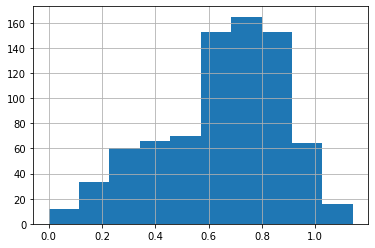

In [21]:
happy['health'].hist(bins=10)

<AxesSubplot:>

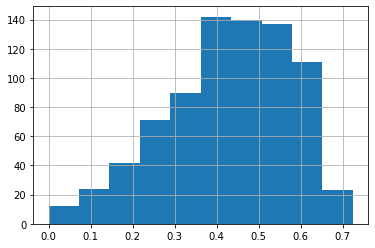

In [22]:
happy['freedom'].hist(bins=10)

<AxesSubplot:>

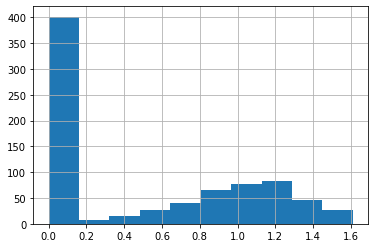

In [23]:
happy['family'].hist(bins=10)

In [24]:
happy['great country'] = np.where((happy['Happiness Category'] == 'The most happy') &
         (happy['health'] > 0.7) &
         (happy['freedom'] > 0.65) &                       
         (happy['family'] > 1.15), 1, 0)

In [25]:
happy.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score,Good cpi_score,Happiness Category,great country
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88,1,The most happy,0
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91,1,The most happy,0
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79,0,The most happy,0
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86,1,The most happy,0
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90,1,The most happy,0


# 3. Генеральная совокупность и выборка

Посмотрим частотаную таблицу для категориальной переменной Happiness Category, что отобразит то, сколько раз встречается каждая категория.

In [26]:
happy['Happiness Category'].value_counts()

Sad                227
Okay               214
Very Sad           167
The most happy      88
Most depressing     54
Happy               42
Name: Happiness Category, dtype: int64

На основании нашего датасета в мире преобладают "грустные страны", их 227.

Перейдем к группировке, отобразим суммарные значения влиялия семьи по континтетам, таким образом мы узнаем, в какой части света семья играет наибольшую роль.

In [27]:
happy.groupby('continent')['family'].sum()

continent
Africa            77.508491
Asia             104.572007
Australia          7.964677
Europe           134.630633
North America     10.454882
South America     64.827360
Name: family, dtype: float64

Согласно выгружнным данным, наибольший весь семьи фиксируется в Европе, но это может быть связано с преобладанием количества стран на этом континенте.
Также посмотрим на распределение переменной "отличная страна" по континентам и годам.

In [28]:
happy.groupby(['continent', 'Year'])['great country'].sum()

continent      Year
Africa         2015    0
               2016    0
               2017    0
               2018    0
               2019    0
               2020    0
Asia           2015    0
               2016    0
               2017    0
               2018    0
               2019    0
               2020    0
Australia      2015    0
               2016    1
               2017    0
               2018    0
               2019    0
               2020    0
Europe         2015    0
               2016    3
               2017    0
               2018    0
               2019    0
               2020    0
North America  2015    0
               2016    0
               2017    0
               2018    0
               2019    0
               2020    0
South America  2015    0
               2016    0
               2017    0
               2018    0
               2019    0
               2020    0
Name: great country, dtype: int32

Таким образом, мы видим, что "отличные" условя встречались только в 2016 году в Австралии и в трех странах Европы.

Визуализируем распределения категорий счастья по континентам, для этого обратимся к столбачатому графику. Для того, чтобы график отобразился в читаемом виде обратимся к функции "unstack", которая превратит категории в столбцы, а континенты в ряды. Получается красивый и понятный график.

<AxesSubplot:xlabel='continent'>

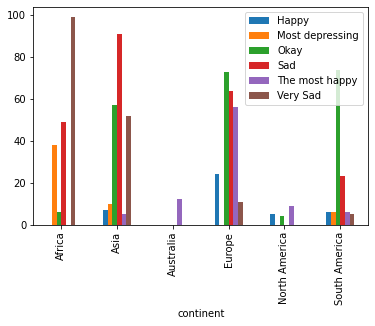

In [29]:
happy.groupby('continent')['Happiness Category'].value_counts().unstack().plot(kind='bar')

Можем сделать вывод о том, что в Африке превалируют очень грустные страны, в Азии - грустные, в Европк и Южной Америке = нормальные, а в Северной Америке и в Австалии больше всего наиболее счастливых стран.

# 4. Меры центральных тендеции и разброса

Посмотрим на меры центральных тенденций по всем переменным сразу.

In [30]:
happy.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score,Good cpi_score,great country
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020,0.078283,0.005051
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833,0.268786,0.070932
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000,0.000000,0.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000,0.000000,0.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000,0.000000,0.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000,0.000000,0.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000,1.000000,1.000000


Сгруппируем наш датасет по годам и отобразим выявим динамику среднего ВВП на душу населения по среднему арифметическому, моде и медиане.

<AxesSubplot:xlabel='Year'>

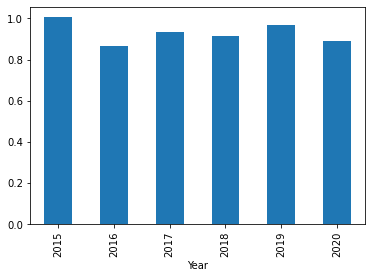

In [31]:
happy.groupby('Year')['gdp_per_capita'].agg(pd.Series.mean).plot(kind='bar')

На осоновании графика выше можно сделать вывод о том, что к 2020 году ВВП на душу населения сократилось относительно 2015 года.
Теперь посмотрим на динамику медианы в соответствии с распределением по континентам.

In [32]:
happy.groupby(['Year', 'continent'])['gdp_per_capita'].agg(pd.Series.median)

Year  continent    
2015  Africa           0.495222
      Asia             1.027236
      Australia        1.445060
      Europe           1.323136
      North America    1.479204
      South America    1.018023
2016  Africa           0.353320
      Asia             0.890120
      Australia        1.291880
      Europe           1.164410
      North America    1.326290
      South America    0.879695
2017  Africa           0.463000
      Asia             0.949000
      Australia        1.337500
      Europe           1.242000
      North America    1.365000
      South America    0.936000
2018  Africa           0.442000
      Asia             0.918000
      Australia        1.304000
      Europe           1.205000
      North America    1.330000
      South America    0.911500
2019  Africa           0.457345
      Asia             0.996730
      Australia        1.402545
      Europe           1.279685
      North America    1.440150
      South America    0.984540
2020  Africa        

Проанализируем модальные значения для категорий счастья по континентам, далее выявим среднее и медиану по переменной "уровня счастья" для каждого континента.

In [33]:
happy.groupby('continent')['Happiness Category'].agg(lambda x: x.value_counts().index[0])

continent
Africa                 Very Sad
Asia                        Sad
Australia        The most happy
Europe                     Okay
North America    The most happy
South America              Okay
Name: Happiness Category, dtype: object

In [34]:
happy.groupby('continent')['happiness_score'].agg(['mean', 'median'])

,mean,median
continent,,
Africa,4.353944,4.3680
Asia,5.267553,5.2395
Australia,7.289033,7.2928
Europe,6.193717,6.0459
North America,7.000539,7.0485
South America,5.865516,6.0055


Выведенные цифры подтверждают наше суждение о том, что наиболее счастливые страны расположены в Северной Америке и в Австралии.
Сформируем пивотальную таблицу по медиане и среднем значениям по уровням отношения к коррупции, также учтем уровени счастья и доверия государству в разбивке по континентам. 

In [35]:
happy.pivot_table(index='continent', 
                  values=['happiness_score', 'government_trust', 'cpi_score'],
                  aggfunc=['mean', 'median'])

mean                                     median  \
               cpi_score government_trust happiness_score cpi_score   
continent                                                             
Africa         34.197917         0.099369        4.353944      33.0   
Asia           38.076577         0.126775        5.267553      35.5   
Australia      83.166667         0.364184        7.289033      83.0   
Europe         59.793860         0.145965        6.193717      59.0   
North America  60.666667         0.195445        7.000539      72.5   
South America  36.375000         0.093155        5.865516      34.0   

                                                
              government_trust happiness_score  
continent                                       
Africa                0.082000          4.3680  
Asia                  0.104629          5.2395  
Australia             0.368185          7.2928  
Europe                0.077758          6.0459  
North America         0.155592          7.0485  
South America         0.086377          6.0055

Перейдем к анализу мер размахов по переменной "уровень счастья" в соответствии с годами

In [36]:
happy_by_year = pd.DataFrame(happy.groupby('Year')['happiness_score'].sum())

In [37]:
happy_by_year.describe

<bound method NDFrame.describe of       happiness_score
Year                 
2015       717.747999
2016       718.112000
2017       726.904000
2018       721.340000
2019       716.853000
2020       733.904399>

<AxesSubplot:xlabel='Year'>

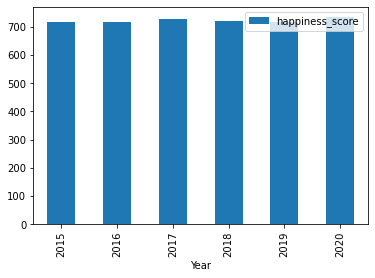

In [38]:
happy_by_year.plot(kind='bar')

In [39]:
# размах
happy_by_year['happiness_score'].max() - happy_by_year['happiness_score'].min()

17.05139915699999

In [40]:
# интерквартильный размах
happy_by_year['happiness_score'].quantile(0.75) - happy_by_year['happiness_score'].quantile(0.25)

7.674000426750013

In [41]:
# перцентили
print(np.percentile(happy_by_year['happiness_score'], 25))
print(np.quantile(happy_by_year['happiness_score'], 0.25))

717.83899957325
717.83899957325


In [42]:
#дисперсия и ср.квадратичное отклонение для генеральной совокупности
print(happy_by_year['happiness_score'].var(ddof=0))
print(happy_by_year['happiness_score'].std(ddof=0))

37.420432802453824
6.117224272695405


# 5. Z-оценка. Выбросы

Проверим отношение к коррупции по континентам. 

<AxesSubplot:>

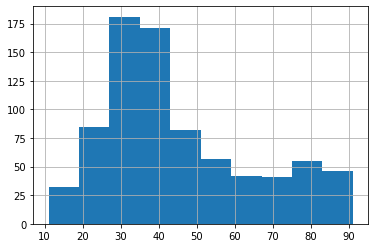

In [43]:
happy['cpi_score'].hist(bins=10)

In [44]:
EU = happy[happy['continent'] == 'Europe'] # EU = Европа
NA = happy[happy['continent'] == 'North America'] # NA = Севереная Америка
SA = happy[happy['continent'] == 'South America'] # NA = Южная Америка
AU = happy[happy['continent'] == 'Australia'] # AU = Австралия
Asia = happy[happy['continent'] == 'Asia']
Africa = happy[happy['continent'] == 'Africa']

<AxesSubplot:>

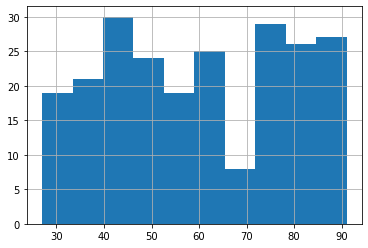

In [45]:
EU['cpi_score'].hist()

<AxesSubplot:>

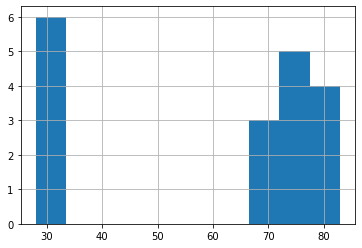

In [46]:
NA['cpi_score'].hist()

<AxesSubplot:>

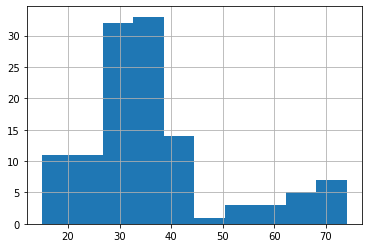

In [47]:
SA['cpi_score'].hist()

<AxesSubplot:>

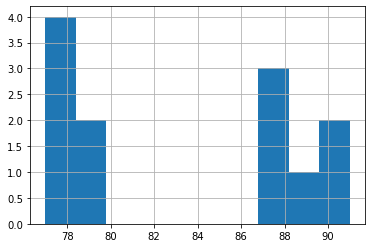

In [48]:
AU['cpi_score'].hist()

<AxesSubplot:>

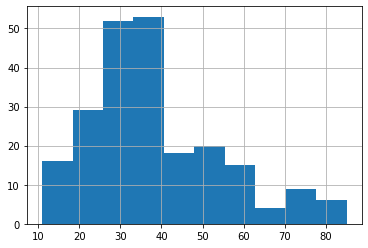

In [49]:
Asia['cpi_score'].hist()

<AxesSubplot:>

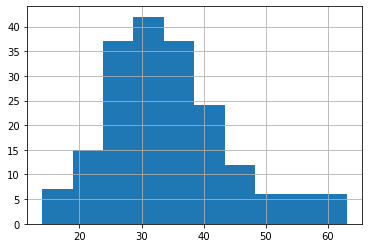

In [50]:
Africa['cpi_score'].hist()

Отобразив распределения отношения к коррупции по континентам за весь анализируемый период мы видим достаточно сильную динамику и различия в разрбросах.
Наилучшее отношение к коррупции фиксируется в странах Австралии - разброс примерно от 75 до 95, при этом от 79 до 89 значений нет. Также зафиксировано интресное распределение по старанам Северной Америки - разброс в диапазоне 30 и 69-85, между 30 и 69 оценок нет.

Для выявления z-score для генеральной совокупности приступаем к стандартизации по каждому континенту через библиотеку scipy.

In [51]:
scipy.stats.zscore(EU['cpi_score'])

0      1.522723
1      1.684679
2      1.036853
3      1.414752
4      1.630694
         ...   
731   -0.528726
732   -0.690683
745   -0.852639
753   -1.284523
768   -1.446480
Name: cpi_score, Length: 228, dtype: float64

Создадим колонку z-score со значениями по континентам.

In [52]:
EU['z-score'] = scipy.stats.zscore(EU['cpi_score'])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10224\4248269291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EU['z-score'] = scipy.stats.zscore(EU['cpi_score'])


In [53]:
NA['z-score'] = scipy.stats.zscore(NA['cpi_score'])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10224\227385024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NA['z-score'] = scipy.stats.zscore(NA['cpi_score'])


In [54]:
SA['z-score'] = scipy.stats.zscore(SA['cpi_score'])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10224\3328046054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SA['z-score'] = scipy.stats.zscore(SA['cpi_score'])


In [55]:
AU['z-score'] = scipy.stats.zscore(AU['cpi_score'])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10224\3056301863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AU['z-score'] = scipy.stats.zscore(AU['cpi_score'])


In [56]:
Asia['z-score'] = scipy.stats.zscore(Asia['cpi_score'])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10224\716030464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Asia['z-score'] = scipy.stats.zscore(Asia['cpi_score'])


In [57]:
Africa['z-score'] = scipy.stats.zscore(Africa['cpi_score'])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10224\126439123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Africa['z-score'] = scipy.stats.zscore(Africa['cpi_score'])


In [58]:
happy = pd.concat([EU, NA, SA, AU, Asia, Africa])

Сравним z-score 

<AxesSubplot:>

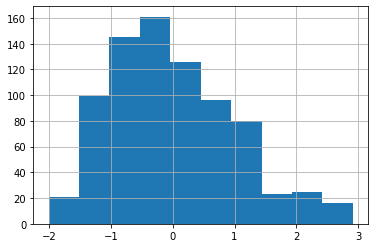

In [59]:
happy['z-score'].hist()

Получается, что основное распределение у нас от -1 до 1. Посмотрим, по каким странам фиксируется наихудшее отношение к коррупции (от -1.5). 

In [60]:
happy[happy['z-score'] < -1.5]

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score,Good cpi_score,Happiness Category,great country,z-score
44,Russia,5.9630,1.281778,1.469282,0.547349,0.373783,0.052264,0.032963,2.205607,Europe,2015,0.000000,29,0,Okay,0,-1.662422
59,Belarus,5.5690,1.156558,1.444945,0.637714,0.295400,0.155138,0.156314,1.723233,Europe,2015,0.000000,32,0,Sad,0,-1.500465
113,Ukraine,4.0960,0.894652,1.394538,0.575904,0.122975,0.270061,0.023029,0.814382,Europe,2015,0.000000,27,0,Very Sad,0,-1.770393
176,Moldova,5.8890,0.594480,1.015280,0.618260,0.328180,0.209510,0.016150,3.107120,Europe,2016,0.000000,30,0,Okay,0,-1.608436
188,Russia,5.7160,1.137640,1.236170,0.669260,0.366790,0.001990,0.030050,2.273940,Europe,2016,0.000000,29,0,Okay,0,-1.662422
225,Ukraine,4.6810,0.799070,1.202780,0.673900,0.251230,0.152750,0.029610,1.571400,Europe,2016,0.000000,29,0,Very Sad,0,-1.662422
325,Russia,5.6480,1.183000,0.000000,0.726000,0.334000,0.082000,0.031000,0.000000,Europe,2017,1.452000,29,0,Sad,0,-1.662422
328,Moldova,5.5290,0.685000,0.000000,0.739000,0.245000,0.181000,0.000000,0.000000,Europe,2017,1.328000,31,0,Sad,0,-1.554451
378,Ukraine,4.3320,0.820000,0.000000,0.739000,0.178000,0.187000,0.010000,0.000000,Europe,2017,1.390000,30,0,Very Sad,0,-1.608436
447,Russia,5.8100,1.151000,0.000000,0.599000,0.399000,0.065000,0.025000,0.000000,Europe,2018,1.479000,28,0,Okay,0,-1.716407


In [61]:
happy[happy['z-score'] < -1.5].shape

(27, 17)

Мы зафиксировали 27 выбросов из датасета. В таблице выше отображены наиболее коррумпированные страны.
Далее сгоруппируем датасет по категориям счастья и посмотрим на отношение к коррупции в каждой категории.

In [62]:
happy.groupby('Happiness Category')['z-score'].mean()

Happiness Category
Happy              0.903399
Most depressing   -0.205986
Okay               0.091140
Sad               -0.379911
The most happy     1.024172
Very Sad          -0.300664
Name: z-score, dtype: float64

Как и предполагалаось, наилучшее отношение к коррупции фиксируется в старанах с самым высоким уровенем счастья и наоборот.

Проверим, есть ли выбросы по переменной доверия правительству. 

In [63]:
happy['government_trust'].describe()

count    792.000000
mean       0.125720
std        0.109032
min        0.000000
25%        0.052862
50%        0.089000
75%        0.154250
max        0.551910
Name: government_trust, dtype: float64

In [64]:
q1 = happy['government_trust'].quantile(0.25)
q3 = happy['government_trust'].quantile(0.75)
iqr = q3 - q1

In [65]:
iqr_outlier_threshold_bottom = q1 - 1.5 * iqr
iqr_outlier_threshold_up = q3 + 1.5 * iqr
print(iqr_outlier_threshold_bottom)
print(iqr_outlier_threshold_up)

-0.09921875
0.30633125


In [66]:
happy[happy['government_trust'] > iqr_outlier_threshold_up].shape

(77, 17)

Фиксируем, что у нас 77 выбросов по переменной доверия к правительству. Посмотрим, относительно категорий счастья в странах. 

In [67]:
happy[happy['government_trust'] > iqr_outlier_threshold_up]['Happiness Category'].value_counts()

The most happy     51
Happy               9
Okay                8
Most depressing     6
Very Sad            2
Sad                 1
Name: Happiness Category, dtype: int64

Инетерсно, что наибольшее количество выбросов зафисикровано по категории с наименьшим числом стран. Сгруппируем распределение выбросов по годам.

In [68]:
happy[happy['government_trust'] > iqr_outlier_threshold_up]['Year'].value_counts()

2016    18
2020    15
2019    13
2017    11
2015    10
2018    10
Name: Year, dtype: int64

# 6. Корреляция

Сначала выявим с каким значением больше всего коррелируется показатель счаться, затем задаем переменные, группированные по континентам по переменным счастья, ВВП на душу населения, здоровья и отношения к коррупции.

In [69]:
happy.corr()['happiness_score'].sort_values() #выявляем наиболее высокие степени коррелляции

Year                 0.023495
great country        0.124613
family               0.154946
generosity           0.155419
dystopia_residual    0.174161
social_support       0.192633
z-score              0.404490
government_trust     0.455477
Good cpi_score       0.467090
freedom              0.544284
cpi_score            0.693001
health               0.753534
gdp_per_capita       0.793267
happiness_score      1.000000
Name: happiness_score, dtype: float64

In [70]:
happy_mean = happy.groupby(happy['continent'])['happiness_score'].mean()
gdp_mean = happy.groupby(happy['continent'])['gdp_per_capita'].mean()
health_mean = happy.groupby(happy['continent'])['health'].mean()
cpi_mean = happy.groupby(happy['continent'])['cpi_score'].mean()

In [71]:
happy_important = pd.concat([happy_mean, gdp_mean, health_mean, cpi_mean], axis=1)

In [72]:
happy_important.corr()

,happiness_score,gdp_per_capita,health,cpi_score
happiness_score,1.000000,0.945707,0.956723,0.872614
gdp_per_capita,0.945707,1.000000,0.982672,0.868432
health,0.956723,0.982672,1.000000,0.838792
cpi_score,0.872614,0.868432,0.838792,1.000000


У всех выделенных переменных фиксируется достаточно высокая корреляция, наиболее сильная между переменным уровня счастья и ВВП на душу неселения, счастье и здоровье, здоровье и ВВП на душу населения. Отразим это на графиках.

<AxesSubplot:xlabel='gdp_per_capita', ylabel='happiness_score'>

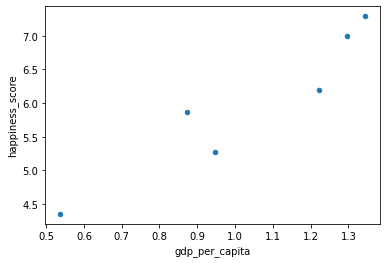

In [73]:
happy_important.plot('gdp_per_capita','happiness_score', kind='scatter')

<AxesSubplot:xlabel='happiness_score', ylabel='health'>

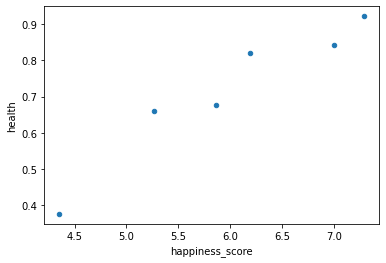

In [74]:
happy_important.plot('happiness_score','health', kind='scatter')

<AxesSubplot:xlabel='gdp_per_capita', ylabel='health'>

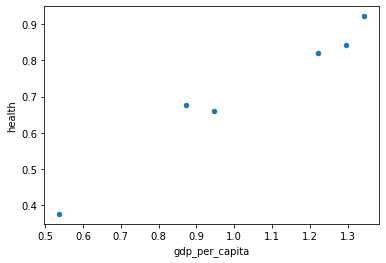

In [75]:
happy_important.plot('gdp_per_capita','health', kind='scatter')

Области точек не сильно выражены, в силу того, что континентов всего 6, наблюдается зависимость - чем выше ВВП на душу населения тем выше уровень счатья и уровень здоровья в старане. Также чем счастливие старна, тем выше уровень здоровья в ней.
Рассредоточенность точек связана с сильным разбросом показателей по континентам.

In [76]:
happy_important.corr()['gdp_per_capita'].sort_values()

cpi_score          0.868432
happiness_score    0.945707
health             0.982672
gdp_per_capita     1.000000
Name: gdp_per_capita, dtype: float64

Делаем вывод, что и показатель счастья, и показатель отношения к коррупции в большей степени коррелируется с показателем ВВП на душу населения.

Также посмотрим корреляцию нашего маленького датасета со всеми переменными в нем.

In [77]:
corr = happy_important.corr()
c1 = corr.unstack()
c1.sort_values(ascending = False)

happiness_score  happiness_score    1.000000
gdp_per_capita   gdp_per_capita     1.000000
health           health             1.000000
cpi_score        cpi_score          1.000000
gdp_per_capita   health             0.982672
health           gdp_per_capita     0.982672
happiness_score  health             0.956723
health           happiness_score    0.956723
happiness_score  gdp_per_capita     0.945707
gdp_per_capita   happiness_score    0.945707
happiness_score  cpi_score          0.872614
cpi_score        happiness_score    0.872614
gdp_per_capita   cpi_score          0.868432
cpi_score        gdp_per_capita     0.868432
health           cpi_score          0.838792
cpi_score        health             0.838792
dtype: float64

# 7. Введение в визуализацию данных

Построим столбчатую диаграмму по переменной уровня здоровья. Для начала агрегируем данные по годам и найдем средний уровень здоровья по каждому году.

In [78]:
happy_health = happy.groupby(happy['Year'])['health'].mean()
happy_health

Year
2015    0.573726
2016    0.654272
2017    0.755167
2018    0.620212
2019    0.571824
2020    0.716946
Name: health, dtype: float64

<BarContainer object of 6 artists>

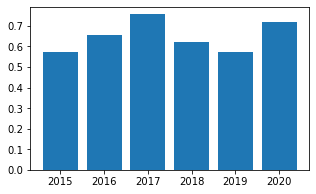

In [79]:
fig, ax = plt.subplots(figsize=(5,3)) # с помощью функции figsize выбираем нужную размерность

ax.bar(happy_health.index, happy_health)

Отобразим на графике динамику счастья по годам.

In [80]:
happy_sum = happy.groupby(happy['Year'])['happiness_score'].sum()
happy_sum

Year
2015    717.747999
2016    718.112000
2017    726.904000
2018    721.340000
2019    716.853000
2020    733.904399
Name: happiness_score, dtype: float64

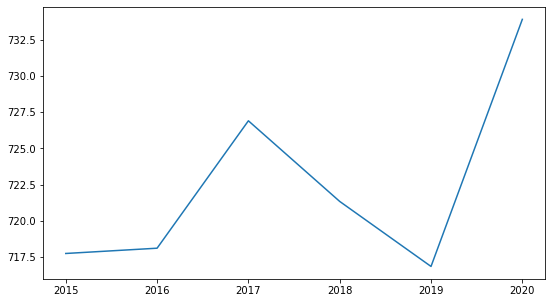

In [81]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(happy_sum)

Сгруппируем суммы счастья стран по годам и континентам, затем создадим 6 графиков для кажого континента, стандартизируя шкалы.

In [82]:
happy_year = happy.groupby(['continent', 'Year'])['happiness_score'].mean()
happy_year

continent      Year
Africa         2015    4.311844
               2016    4.288156
               2017    4.426656
               2018    4.355437
               2019    4.275531
               2020    4.466041
Asia           2015    5.284027
               2016    5.255919
               2017    5.252027
               2018    5.264108
               2019    5.264784
               2020    5.284451
Australia      2015    7.299000
               2016    7.285000
               2017    7.267500
               2018    7.298000
               2019    7.323500
               2020    7.261200
Europe         2015    6.128895
               2016    6.076421
               2017    6.285158
               2018    6.201711
               2019    6.091237
               2020    6.378879
North America  2015    6.962333
               2016    7.244333
               2017    6.921667
               2018    6.900667
               2019    7.095333
               2020    6.878900
South America  2015 

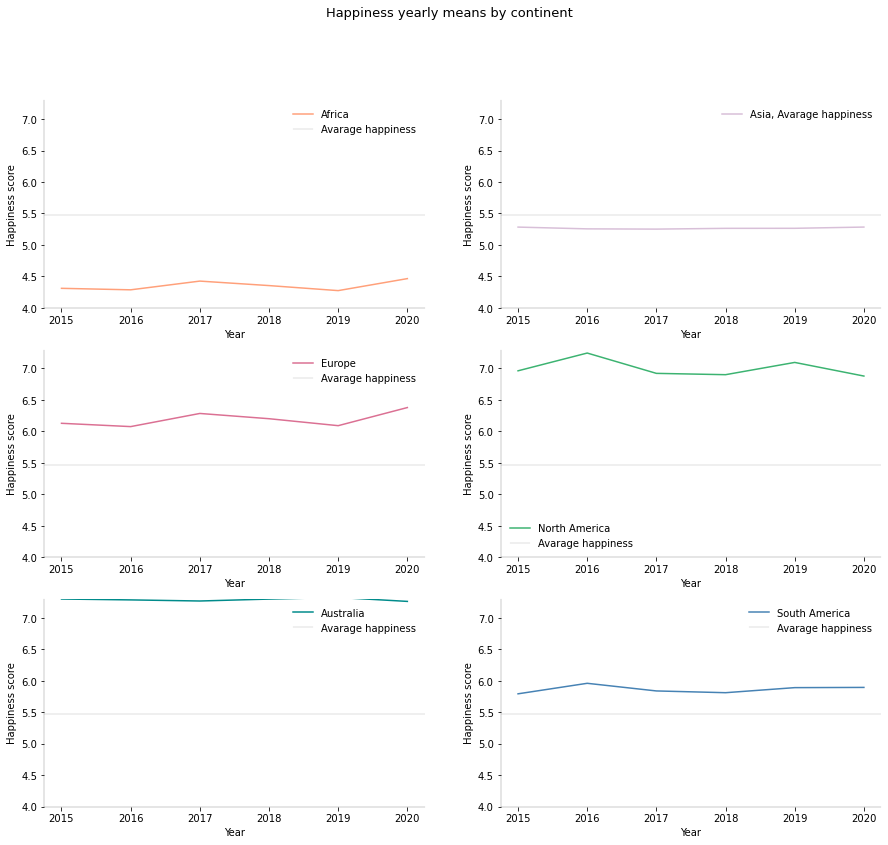

In [83]:
fig, ax = plt.subplots(3,2, figsize=(15,13))

ax[0][0].plot(happy.groupby(['continent', 'Year'])['happiness_score'].mean().loc['Africa'], c='#FFA07A')
ax[0][1].plot(happy.groupby(['continent', 'Year'])['happiness_score'].mean().loc['Asia'], c='#D8BFD8')
ax[1][0].plot(happy.groupby(['continent', 'Year'])['happiness_score'].mean().loc['Europe'], c='#DB7093')
ax[1][1].plot(happy.groupby(['continent', 'Year'])['happiness_score'].mean().loc['North America'], c='#3CB371')
ax[2][1].plot(happy.groupby(['continent', 'Year'])['happiness_score'].mean().loc['South America'], c='#4682B4')
ax[2][0].plot(happy.groupby(['continent', 'Year'])['happiness_score'].mean().loc['Australia'], c='#008B8B')

for axis in ax.ravel():
    axis.set_xlabel('Year')
    axis.set_ylim(4,7.30)
    axis.set_ylabel('Happiness score')
    axis.axhline(5.47, c='#696969', lw=0.2) #добавляем линию среднего уровня счастья
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.spines['left'].set_linewidth(0.2)
    axis.spines['bottom'].set_linewidth(0.2)

ax[0][0].legend(['Africa', 'Avarage happiness'], frameon=False)
ax[0][1].legend(['Asia, Avarage happiness'], frameon=False)
ax[1][0].legend(['Europe', 'Avarage happiness'], frameon=False)
ax[1][1].legend(['North America', 'Avarage happiness'], frameon=False)
ax[2][1].legend(['South America', 'Avarage happiness'], frameon=False)
ax[2][0].legend(['Australia', 'Avarage happiness'], frameon=False)

fig.suptitle('Happiness yearly means by continent', fontsize=13)
fig.savefig('happiness.pdf')
fig.savefig('happiness.png', dpi=100)

Графики выше иллюстрируют предыдущие выводы о том, что в страны Австралии устойчиво фикисировали наивысшие показатели счастья с 2015 по 2020 года, на втором месте Северная Америка, в странах на этом континенте фиксируется некоторая динамика относительно годов, самые "печальные" года - 2017 и 2018, а самый счастливый - 2016. Стоит отметить, что даже самые низкие показатели по Северной Америке находятся на уровне сильно выше среднего значения счастья по миру.
На третьем месте фиксируется Европа, уровень счастья в странах этого континента также заметно выше среднего, динамика варьируется от 6.0 до 6.5, что говорит о том, что люди в этих странах относительно счастливы. Южная Америка также фиксирует счастье выше сроднено, пик пришелся на 2016 после этого был спад в течение двух лет и с 2018 года прослеживается небольшой рост счастья, но уровень 2016 года еще не достигнут.
В странах Азии и Африки уровень счастья заметно ниже среднемирового. В старнах Азии фикисировался практически стабильный уровень примерно 5.25 в течение всего исследуемого периода. А в странах Африки самым счастливыми годами были 2017 и 2020 с показателем счастья 4.49 и 4.5. 

In [84]:
happy['happiness_score'].describe() #вывели для нахождения среднего для графиков выше

count    792.000000
mean       5.473310
std        1.124726
min        2.566900
25%        4.590750
50%        5.485500
75%        6.300500
max        7.808700
Name: happiness_score, dtype: float64

Построим график рассеивания по переменным уровень счастья, отношение к коррпции, ВВП на душу населения в распределении по континентам.

In [85]:
happy_mean = happy.groupby('continent')['happiness_score'].mean()
gdp_av = happy.groupby('continent')['gdp_per_capita'].mean()
government_av = happy.groupby('continent')['government_trust'].mean()
good_cpi = happy.groupby('continent')['Good cpi_score'].max()

happy_data = pd.concat([happy_mean, gdp_av, government_av, good_cpi], axis=1)

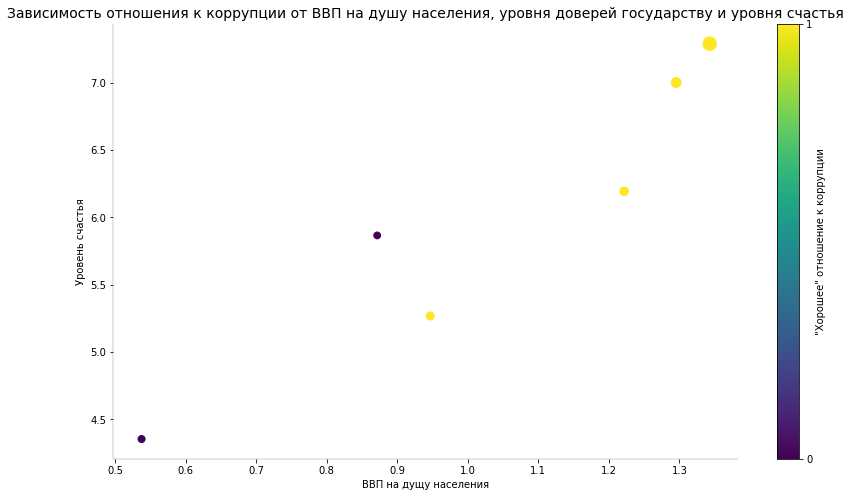

In [86]:
fig, ax = plt.subplots(figsize=(14,8))
graph = ax.scatter(happy_data['gdp_per_capita'], happy_data['happiness_score'], 
           c = happy_data['Good cpi_score'], s = happy_data['government_trust']*500, 
           alpha = 1)
plt.colorbar(graph, ticks=range(3), label='"Хорошее" отношение к коррупции') # выводим легенду для обозначения цветов 

ax.set_title('Зависимость отношения к коррупции от ВВП на душу населения, уровня доверей государству и уровня счастья', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(0.2)
ax.spines['bottom'].set_linewidth(0.2)
ax.set_xlabel('ВВП на дущу населения', fontsize=10)
ax.set_ylabel('Уровень счастья', fontsize=10)

fig.savefig('happy_gdp_cpi.pdf')

Получаем 6 точек, разбросанных по графику, каждая точка отображает континент. Фиолетовым цветом обозначены точки, иллюстрирующие континенты, вклюающие страны с "плохим" отношением к коррупции, то есть это коррумпируемые страны. Желтые - "хорошее" отношение к коррупции. Также фиксируется зивисимость уровеня счастья от ВВП на душу населения - чем выше, тем лучше.

# 8. Продвинутая визуализация

Начнем с разведочного анализа данных.

Сначала отобразим распредление уровней доверя к государству.

<AxesSubplot:xlabel='government_trust', ylabel='Count'>

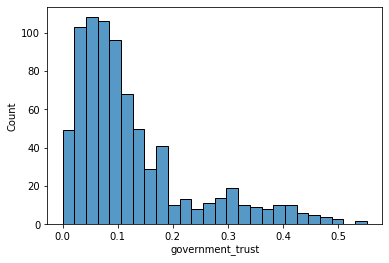

In [87]:
sns.histplot(happy['government_trust'])

Далее посмотрим на распредление по переменной "Хорошее отношение к коррупции", сгруппируем их по целевой переменной и отобразим на столбчатой диаграмме.

In [88]:
happy['Good cpi_score'].value_counts()

0    730
1     62
Name: Good cpi_score, dtype: int64

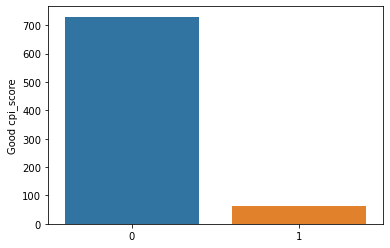

In [89]:
sns.barplot(x=happy['Good cpi_score'].value_counts().index, y=happy['Good cpi_score'].value_counts())
plt.show()

Построим скрипичный график по "Хорошему" отношению к коррпуции и доверию государству, что отбразит распеределение доверия государству в зависимости от целевой переменной,  хорошего отношения к коррупции.

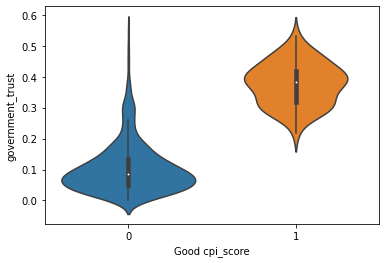

In [90]:
sns.violinplot(x=happy['Good cpi_score'], y=happy['government_trust'])
plt.show()

На основании графика делаем вывод о том, что в большинстве коррумпированных стран фиксируется низкое доверие государству, в странах с "хорошим" отношением к коррпуции наоборото высокое доверие госудаству. 
Для полноты картины посмотрим ящик с усами для этих же переменных.

<AxesSubplot:xlabel='government_trust', ylabel='Count'>

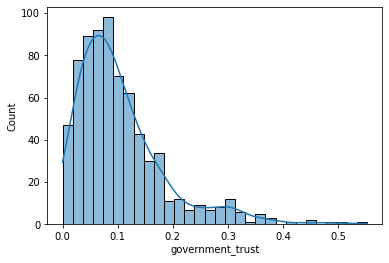

In [91]:
sns.histplot(happy[happy['Good cpi_score']==0]['government_trust'], kde=True)

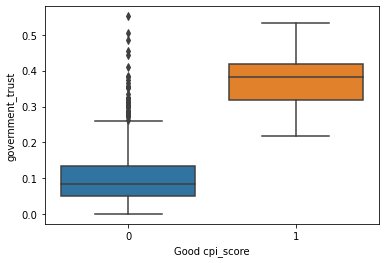

In [92]:
sns.boxplot(x=happy['Good cpi_score'], y=happy['government_trust'])
plt.show()

Данный график чуть менее информативный, чем скрипичный. В катогории стран с плохим отношением к коррупции фиксируется несколько выбросов относительно доверия правительству, несколько стран зафиксированы на уровне выше медианы.

Далее построим тепловую карту корреляции - цвет ячейки будет зависеть от силы корреляции.

In [93]:
cols_num = ['government_trust', 'cpi_score', 'dystopia_residual', 'freedom']

In [94]:
correlation = happy.corr().loc[cols_num, cols_num]

<AxesSubplot:>

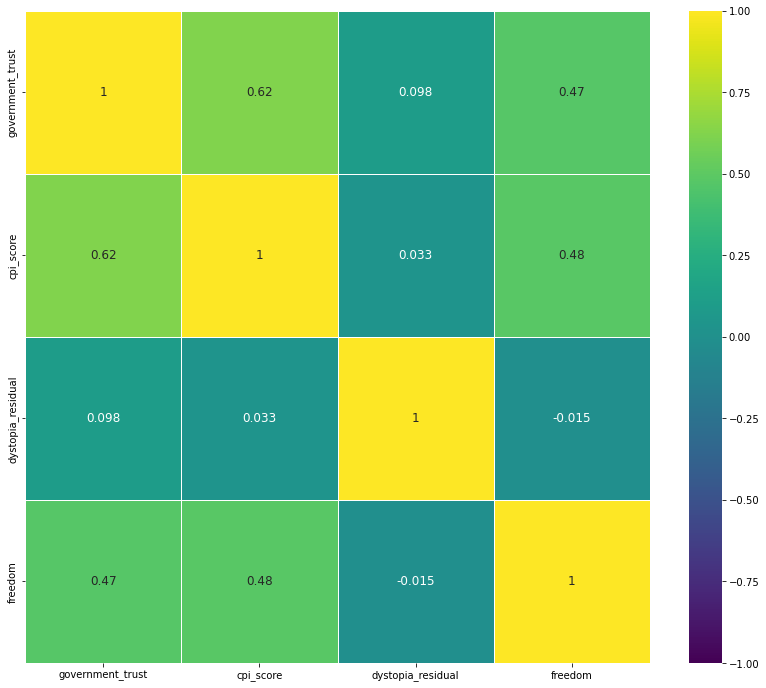

In [95]:
fig , ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation, vmax=1, vmin=-1,
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

На основании графика выше видим, что сильной корреляции между количественными переменными и целевой переменной.

Теперь постром графики рассеивания для всех количественных переменных, а по диагонале автоматически отобразятся гистрограммы, т.к. здесь переменные анализируются самии с собой.

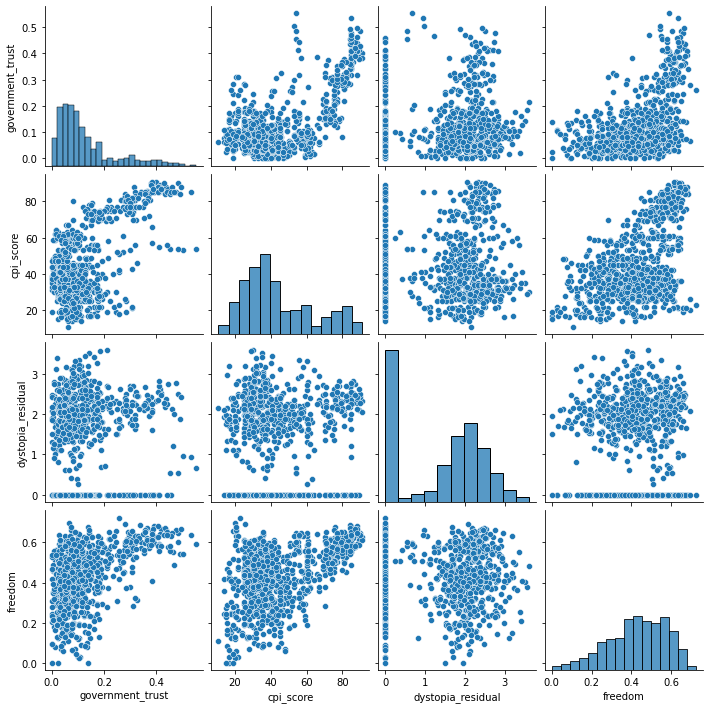

In [96]:
sns.pairplot(happy[cols_num])

Одновременно проанализируем распредление количественной переменной dystopia_residual по обоим категориальным переменным, Good cpi_score и great country, построив ящики с усами. Напомним, что dystopia_residual отражает сравнение своей страны с самым грустным государств.

In [97]:
cat_features = ['Good cpi_score', 'great country']

In [98]:
happy_melted = pd.melt(happy, id_vars='dystopia_residual', value_vars=cat_features)
happy_melted.head()

,dystopia_residual,variable,value
0,2.277027,Good cpi_score,1
1,2.313707,Good cpi_score,1
2,2.322715,Good cpi_score,0
3,2.276716,Good cpi_score,1
4,2.430182,Good cpi_score,1


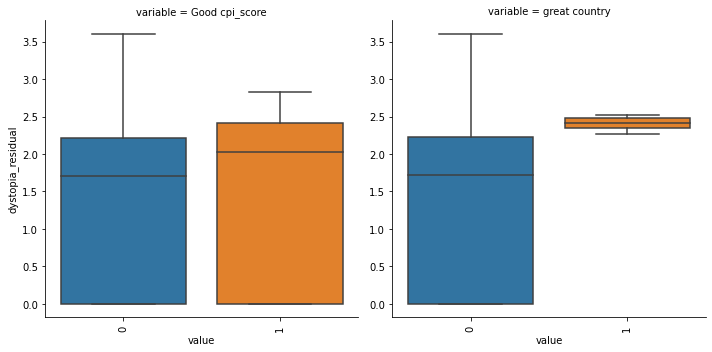

In [99]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90) # просим подписать области вертикально
    
g = sns.FacetGrid(happy_melted, col="variable",  # подписываем сверху "переменная" и какая это переменная
                  col_wrap=2, sharex=False, sharey=False, height=5)
g.map(boxplot, "value", 'dystopia_residual')

На основании графиков сверху можно сделать следюущие выводы. Уровень сравнения своей страны с самой грустной стронйо в мире немного ниже среди коррумпированных стран. Станы попадающие под определение "отличная страна" дают более высокую оценку при сравнении с грустной строной, чем те, кто не попадает под эти критерии. Узость ящика "отличных" стран объясняется маленьким числом стран, подходящих под эти критерии. 

# 9. t-тест

Тестируем гипотезу о том, есть разница между уровенем щедрости в странах с "хорошим" отношением к коррупции, то есть в некоррумпированных странах. Нулевая гипотеза - разницы между этими значениями нет.

**Параметры теста:**
* Двусторонний тест
* alpha = 0.05
* Критическое значение t-критерия: ±1.9667
* Критическая область: (-∞, -1.9667] ∪ [1.9667, ∞)

Поделим датасет на два кусочка - коррумпированные и некоррумпированные страны.

In [100]:
good_cpi = happy[happy['Good cpi_score'] == 1]['generosity']
bad_cpi = happy[happy['Good cpi_score'] == 0]['generosity']

Посмотрим, является ли распредление по первой переменной нормальным.

<AxesSubplot:>

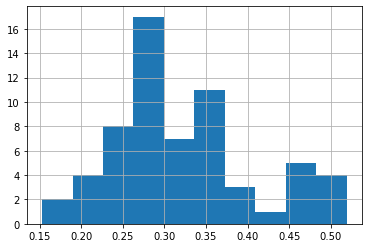

In [101]:
good_cpi.hist()

<AxesSubplot:>

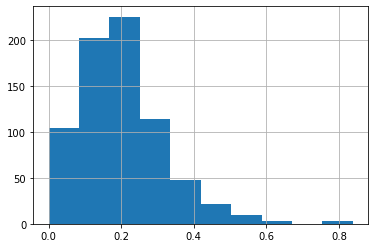

In [102]:
bad_cpi.hist()

Графики относительно похожи на колокольчики, будем считать, что преподссылка нормальности пройдена.

Далее проверим равность дисперсий у заданных переменных.

In [103]:
b_c = len(bad_cpi)
g_c = len(good_cpi)
print(b_c, g_c)

730 62


In [104]:
var_b = bad_cpi.var()
var_g = good_cpi.var()
print(var_b, var_g)

0.014323065604892502 0.007539155800826682


В силу того, что дисперсии не равны, будем использовать критерий Стьюдента с поправкой welch.

In [105]:
mean_b = bad_cpi.mean()
mean_g = good_cpi.mean()
print(mean_b, mean_g)

0.20314067006849332 0.3219263912258064


In [106]:
v_b = var_b/b_c
v_g = var_g/g_c

happy_welch = (v_b + v_g)**2 / (v_b**2 / (b_c - 1) + v_g**2 / (g_c - 1))
print(happy_welch)
print(int(happy_welch)) # отображаем округленное количество степеней свободы

82.0946071593688
82


Внедряем функцию для t-критерия, определяющую можем ли отвергуть нулевую гипотезу. 

In [107]:
def hypothesis_check(p_value, t_critical):
    if abs(p_value) < t_critical:
        print('Отвергаем Н0. Разница между средними статистически значима.')
    else:
        print('Не удалось отвергнуть H0')
        
t_critical = 1.9667 # задаем критическое значение

Приступаем к расчету t-критерия. Сначала выявляем стандартную ошибку.

In [108]:
s_mb_mg = np.sqrt(var_b/b_c + var_g/g_c)
print(s_mb_mg)

0.011883598988733549


In [109]:
t = (mean_b - mean_g) / s_mb_mg
print(t)

-9.995769906905302


In [110]:
hypothesis_check(t, t_critical)

Не удалось отвергнуть H0


Следовательно, делаем вывод, что разница между средними статистически не значима.


# 10. Линейная регрессия 

Будем работать с агерированными данными среднего показателя счастья, щедрости, сравнения с грустной страной и свободой по континентам.

In [111]:
happy_mean = happy.groupby(happy['continent'])['happiness_score'].mean()
generosity_mean = happy.groupby(happy['continent'])['generosity'].mean()
dystopia_residual_mean = happy.groupby(happy['continent'])['dystopia_residual'].mean()
freedom_mean = happy.groupby(happy['continent'])['freedom'].mean()

happy_continent = pd.concat([happy_mean, generosity_mean, dystopia_residual_mean, freedom_mean], axis=1)
happy_continent.head()

,happiness_score,generosity,dystopia_residual,freedom
continent,,,,
Africa,4.353944,0.190301,1.297886,0.362420
Asia,5.267553,0.239480,1.241343,0.438396
Australia,7.289033,0.407926,1.493527,0.615233
Europe,6.193717,0.205434,1.404200,0.434020
North America,7.000539,0.272680,1.777789,0.528074


По агрегированному датасету выше будет построена модель линейной регресии.

Проверим предпоссылки до построения модели:

1.отсутствие мултиколлинарности, т.е. независимые перемнные между собой не коррелирируют.
2. наличие линейной взаимосвязи.

<AxesSubplot:>

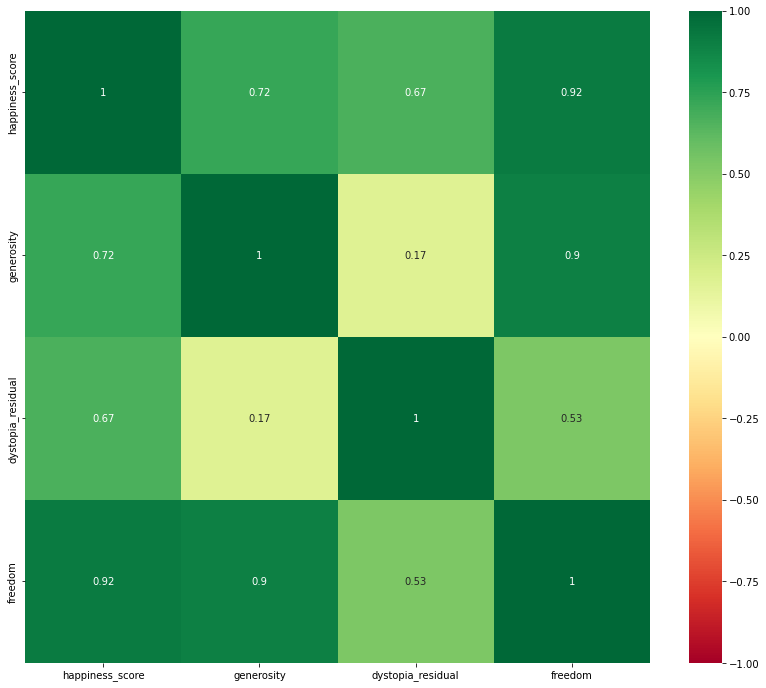

In [112]:
fig , ax = plt.subplots(figsize = (14,12))

sns.heatmap(happy_continent.corr(), annot=True, cmap='RdYlGn', vmax=1, vmin=-1)

Некоторые переменные имеют корреляцию друг с другом, однако также встерчается и умеренная корреляция. Будем считать, что условие выполнено.

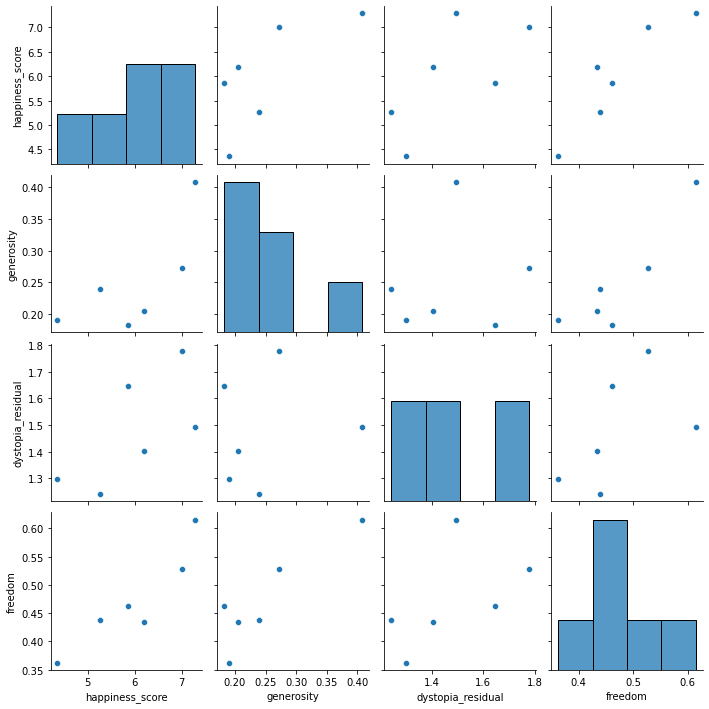

In [113]:
sns.pairplot(happy_continent)

Исходя из графиков, делаем вывод, что тренд линейной зависимости присутствует.
В первую очередь построим модель на основании уровней счастья и свободы, т.к. по данным переменным прослеживается наиболее четкая линия.

In [114]:
X = happy_continent['freedom'] # подразумевается матрица признаков
y = happy_continent['happiness_score'] # массив, целевая переменная

res = scipy.stats.linregress(X, y)
print(res)

LinregressResult(slope=11.473358233741306, intercept=0.563992850807205, rvalue=0.9197592987385274, pvalue=0.009399537516864766, stderr=2.4479757911786044, intercept_stderr=1.1751814193059948)


Вычислим r в квадрате, т.е. коэффициент детерминации

In [115]:
r_sq = res.rvalue ** 2
print(r_sq)

0.8459571676159876


Делаем вывод, что наша модель хорошая, это очень высокое значение для коэффициента детерминации. Наша модель объясняет дисперсию в целевой переменной на 84%. Построим график рассеивания по результатам.

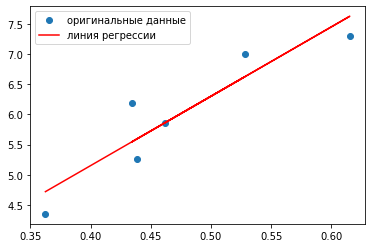

In [116]:
plt.plot(X, y, 'o', label='оригинальные данные')
plt.plot(X, res.intercept + res.slope*X, 'r', label='линия регрессии') # уравнение предсказывает значение "у".
plt.legend()
plt.show()

Для точки, расположенной на линии, ошибка будет минимальной.

Теперь проанализируем уравнение регресии через библиотеку stats models.

In [117]:
X_simple = happy_continent['freedom']
y = happy_continent['happiness_score'] 
X_simple_constant = sm.add_constant(X_simple) # добавим точку пересечения с "у", т.е. константу (свободный член)

mod = sm.OLS(y, X_simple_constant)
res_simple = mod.fit()
print(res_simple.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     21.97
Date:                Wed, 14 Dec 2022   Prob (F-statistic):            0.00940
Time:                        13:38:41   Log-Likelihood:                -2.8841
No. Observations:                   6   AIC:                             9.768
Df Residuals:                       4   BIC:                             9.352
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5640      1.175      0.480      0.6

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Построим линейную регрессию с несколькими предикторами.

In [118]:
X_mult = happy_continent.drop('happiness_score', axis=1)
y = happy_continent['happiness_score']
X_mult_constant = sm.add_constant(X_mult)

mod = sm.OLS(y, X_mult_constant)
res_mult = mod.fit()
print(res_mult.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     6.133
Date:                Wed, 14 Dec 2022   Prob (F-statistic):              0.143
Time:                        13:38:42   Log-Likelihood:                -1.5286
No. Observations:                   6   AIC:                             11.06
Df Residuals:                       2   BIC:                             10.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6359      1.80

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Коэффициент детеминации сократился посравнению с предыдущей моделью. Согласно полученным данным, показатели отношения к коррупции и совободы получаются с отрицательными знаками, что говорит о том, что чем выше эти значения, тем ниже средний уровень счастья на континентах, однако ранее мы подтвреждали обратные гипотезы.


# 11. Логистическая регрессия

Для построения модели немного преобразуем наш датасет, введем новую категориальную переменую. Страны Европы будем обозначать единицей, а все остальные - 0, таким образом, мы сможем качественно построить логистическую регрессию. Выбираем именно Европу, т.к. на этом континенте больше всего стран. 
Другая переменная, которую будем анализировать - хорошее отношение к коррупции.

In [119]:
happy['European'] = np.where((happy['continent'] == 'Europe'), 1, 0)

In [138]:
cols_num = ['generosity', 'gdp_per_capita', 'government_trust', 'dystopia_residual']

Выше обозначаем количественные переменные, к которым вернемся позднее. 
Построим логистическую регрессию.

In [121]:
X = happy['Good cpi_score']
y = happy['European']
X_constant = sm.add_constant(X)
logit = sm.Logit(y, X_constant).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.562321
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               European   No. Observations:                  792
Model:                          Logit   Df Residuals:                      790
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                 0.06318
Time:                        13:38:42   Log-Likelihood:                -445.36
converged:                       True   LL-Null:                       -475.39
Covariance Type:            nonrobust   LLR p-value:                 9.169e-15
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1023      0.086    -12.884      0.000      -1.270      -0.935
Good cpi_score   

coef - логарифм шанса, экспонируем коэффициенты для интерпритации.

In [122]:
print(np.exp(-1.1023))
print(np.exp(2.1583))

0.3321063599749712
8.656409247140784


Интерпритируем значения относительно единицы. В данном случае константа обозначает, что вероятность того, что страна с плохим отношением к коррупции, т.е.коррумпированая, находится в Европе - 8 к 1. Шанс того, что эта страна европейская минимален.

Рассчитаем свободный член для проверки. Для этого построим таблицу сопряженности, чтобы отобразить частоты и посчитать вероятности принадлежности к той или иной группе.

In [123]:
happy.groupby('European')['Good cpi_score'].value_counts().unstack()

Good cpi_score,0,1
European,,
0,548,16
1,182,46


In [124]:
p_1_bad = 182 / (182 + 548) # вероятность наступления события
p_0_bad = 1 - p_1_bad # вероятность ненаступления события
odds_1_bad = p_1_bad / p_0_bad
print(odds_1_bad)
print(np.log(odds_1_bad))

0.33211678832116787
-1.1022685998712203


Построим логистическую регрессию для всех количественных переменных, кроме European.

In [139]:
X = happy[cols_num]
y = happy['European']
X_constant = sm.add_constant(X)
logit = sm.Logit(y, X_constant).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.442574
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               European   No. Observations:                  792
Model:                          Logit   Df Residuals:                      787
Method:                           MLE   Df Model:                            4
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                  0.2627
Time:                        13:59:37   Log-Likelihood:                -350.52
converged:                       True   LL-Null:                       -475.39
Covariance Type:            nonrobust   LLR p-value:                 7.385e-53
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.8931      0.520    -11.339      0.000      -6.912      -4.874
generosi

Центрируем расспределение по среднему значению, чтобы константа не интерпритировалась относительно нулевого значение, а среденего значения.

In [141]:
X = happy[cols_num] - happy[cols_num].mean()
y = happy['European']
X_constant = sm.add_constant(X)
logit = sm.Logit(y, X_constant).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.442574
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               European   No. Observations:                  792
Model:                          Logit   Df Residuals:                      787
Method:                           MLE   Df Model:                            4
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                  0.2627
Time:                        14:06:36   Log-Likelihood:                -350.52
converged:                       True   LL-Null:                       -475.39
Covariance Type:            nonrobust   LLR p-value:                 7.385e-53
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5916      0.137    -11.605      0.000      -1.860      -1.323
generosi

Стандартизируем, т.е. приведем модель к z распределению, чтобы значения интерпритировались не как отклонение на 1 ед., а на одно среднеквадратичное отклонение.

In [142]:
X = (happy[cols_num] - happy[cols_num].mean()) / happy[cols_num].std()
y = happy['European']
X_constant = sm.add_constant(X)
logit = sm.Logit(y, X_constant).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.442574
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               European   No. Observations:                  792
Model:                          Logit   Df Residuals:                      787
Method:                           MLE   Df Model:                            4
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                  0.2627
Time:                        14:10:16   Log-Likelihood:                -350.52
converged:                       True   LL-Null:                       -475.39
Covariance Type:            nonrobust   LLR p-value:                 7.385e-53
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5916      0.137    -11.605      0.000      -1.860      -1.323
generosi

In [143]:
np.exp(2.0615)

7.857747596164978

ВВП на душу население явялется важным коэффициентом относительно принадложности к европейскому континенту.

In [144]:
np.exp(0.0144)

1.0145041794607625

Сравнение себя с самой грустной страной в мире дает шанс 1 к 1 быть часть Европы.

# Вывод

Итак, мы провели большой анализ датасета по соотношению уровней счастья и коррупции в странах мира. Большая часть анализа была проведена относительно распределения по континентам. Мы выявили, что самыми счастливыми и не коррумпированными странами явяляются страны Австралии (Австралия и Новая Зеландия) и Северная Америка (США и Канада). 2016 был самым счастливым годом для большиства стран. ВВП на душу населения и уровень здоровья являеются основополагающими относительно формированя изученных уровней.
Страны Африки явялются наиболее несчастными, все изученные показатели находили на критических уровнях в течение всего анализируемого периода.